Apply bagging with 500 trees to the fashion-MNIST data and report
the accuracy. Plot the out-of-bag error and use it to select a
reasonable number of trees. Apply bagging again but with this
size instead to the dataset. How does the corresponding test error
compare with that you obtained with 500 trees?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score
import sklearn.decomposition
import sklearn.ensemble
import sklearn.tree 
from sklearn.metrics import accuracy_score


In [2]:
fashion_mnist = keras.datasets.fashion_mnist;
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data();
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_all = np.vstack((X_train,X_test))
labels = np.hstack((train_labels,test_labels))

In [4]:
col_means = np.mean(X_train, axis = 0)
X_tilda = X_train - col_means
X_test_centered = X_test - col_means

k=190
PCA = sklearn.decomposition.PCA(n_components = k)
PCA.fit(X_tilda)
Y_train = PCA.transform(X_tilda)
Y_test = PCA.transform(X_test_centered)

In [5]:
"""
#Do not run again, it will take too long
oob_scores = []
test_scores = []
N_list = list(range(350,501,50))
for N in N_list:
    model = sklearn.ensemble.BaggingClassifier(n_estimators = N, oob_score = True)
    model.fit(Y_train,train_labels)
    oob_score = model.oob_score_
    oob_scores.append(oob_score)
    preds = model.predict(Y_test)
    test_score = accuracy_score(y_true = test_labels,y_pred = preds)
    test_scores.append(test_score)
    print(N,oob_score, test_score)


print(oob_scores)
print(test_scores)
plt.plot(N_list, oob_scores, label = 'Out of Bag',color = 'r')
plt.plot(N_list, test_scores, label = 'Test',color = 'b')

plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Bagging Accuracy vs Number of Trees');
"""

"\n#Do not run again, it will take too long\noob_scores = []\ntest_scores = []\nN_list = list(range(350,501,50))\nfor N in N_list:\n    model = sklearn.ensemble.BaggingClassifier(n_estimators = N, oob_score = True)\n    model.fit(Y_train,train_labels)\n    oob_score = model.oob_score_\n    oob_scores.append(oob_score)\n    preds = model.predict(Y_test)\n    test_score = accuracy_score(y_true = test_labels,y_pred = preds)\n    test_scores.append(test_score)\n    print(N,oob_score, test_score)\n\n\nprint(oob_scores)\nprint(test_scores)\nplt.plot(N_list, oob_scores, label = 'Out of Bag',color = 'r')\nplt.plot(N_list, test_scores, label = 'Test',color = 'b')\n\nplt.xlabel('Number of Trees')\nplt.ylabel('Accuracy')\nplt.title('Bagging Accuracy vs Number of Trees');\n"

OOB [0.8417166666666667, 0.84855]
Test [0.8396, 0.8432]

OOB, Test
0.8427166666666667 0.8422
0.8490333333333333 0.8444
0.84985 0.8454
0.8528 0.8477
0.8532333333333333 0.848
0.8534833333333334 0.8476
350 0.8537333333333333 0.8472
400 0.8549333333333333 0.8465
450 0.8553666666666667 0.8454
500 0.8546166666666667 0.8469

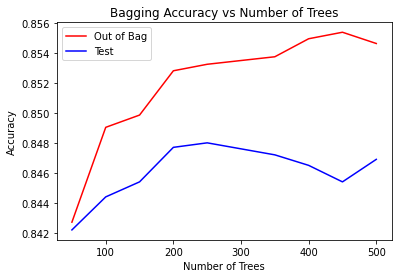

In [17]:
N_list = list(range(50,501,50))
oob_scores = [0.8427166666666667, 0.8490333333333333, 0.84985, 0.8528, 0.8532333333333333, 
           0.8534833333333334,  0.8537333333333333,  0.8549333333333333,  0.8553666666666667,  0.8546166666666667] 

test_scores = [0.8422, 0.8444, 0.8454, 0.8477, 0.848, 0.8476, 0.8472, 0.8465, 0.8454, 0.8469]

plt.plot(N_list, oob_scores, label = 'Out of Bag',color = 'r')
plt.plot(N_list, test_scores, label = 'Test',color = 'b')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Bagging Accuracy vs Number of Trees');